# Logistic Regression prediction of surviving a Titanic accident

### Data
----
Dataset consists of historical data of passangers participating in Titanic crash. Data has many information about a passanger located in several feature columns, labale column - 'Survived'. Label column informs us if certain passanger survived Titanic crash. We will try to create a ML model thats predicts chance of surviving based on feature columns. 

The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)

We will build and evaluate our ML model based on training set. Finally we will predict the outcome on test set (test set doesn't have a 'Survived' column.

Data - https://www.kaggle.com/competitions/titanic/overview

### Load our data

In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
df_train = pd.read_csv('train.csv')

In [331]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [332]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [333]:
df_test = pd.read_csv('test.csv')

In [334]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [335]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


----
We have to handle missing data, transform data in columns into numeric type. We have to do it both in train and test DataFrame

#### Missing data

In [336]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [337]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have to do something with these columns:
- Age
- Cabin
- Embarked

In train DataFrame

- Age
- Fare
- Cabin

In test DataFrame


We will fill NaN with a mean value in Age column

In [338]:
# 'Age'
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

We will fill NaN with a mean value in Fare column

In [339]:
# 'Fare'
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

We will fill NaN with a mostly common value in Embarked

In [340]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [341]:
df_train['Embarked'].fillna('S', inplace=True)

We will put 'X' value if data in Cabin is NaN and separate a prefix from Cabin number

In [342]:
df_train['Cabin'].fillna('X', inplace=True)
df_test['Cabin'].fillna('X', inplace=True)

In [343]:
cabin_train = []
for i in list(df_train.Cabin):
    cabin_train.append(i[0])

df_train['Cabin_type'] = cabin_train

cabin_test = []
for i in list(df_test.Cabin):
    cabin_test.append(i[0])

df_test['Cabin_type'] = cabin_test

In [344]:
df_train['Cabin_type'].unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [345]:
df_test['Cabin_type'].unique()

array(['X', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [346]:
df_train = df_train.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)

In [347]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_type     0
dtype: int64

In [348]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_type     0
dtype: int64

### We successfully removed all the missing data, now we have to transfrom non-numeric columns into numeric

Columns with non-numeric data:
- Name
- Sex
- Ticket
- Cabin
- Emabrked

We can see that 'T' value doesn't appear in 'Cabin_type" column in df_test. If we want to performe our model on df_test, columns have to be the same in both data frames. We will create column for 'T' manually.

In [349]:
# 'Cabin'
df_train = pd.get_dummies(data=df_train, columns=['Cabin_type'], drop_first=False)
df_test = pd.get_dummies(data=df_test, columns=['Cabin_type'], drop_first=False)

In [350]:
df_test['Cabin_type_T'] = 0

With Sex column we will simply use get_dummies

In [351]:
# 'Sex'
df_train = pd.get_dummies(data=df_train, columns=['Sex'], drop_first=True)
df_test = pd.get_dummies(data=df_test, columns=['Sex'], drop_first=True)

The same with Embarked

In [352]:
# 'Embarked'
df_train = pd.get_dummies(data=df_train, columns=['Embarked'], drop_first=True)
df_test = pd.get_dummies(data=df_test, columns=['Embarked'], drop_first=True)

Name and Ticket are two coulms that we have to work on, we will separate prefix from ticket number and title from full name

In [353]:
# 'Name'
df_train['Title'] = 0
df_test['Title'] = 0

In [354]:
for i in df_train:
    df_train['Title']=df_train.Name.str.extract('([A-Za-z]+)\.')
    
for j in df_test:
    df_test['Title']=df_test.Name.str.extract('([A-Za-z]+)\.')

In [355]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Capt          1
Don           1
Lady          1
Ms            1
Mme           1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

We will group similar titles

In [356]:
df_train['Title'].replace(['Mr','Miss','Mrs','Master','Dr','Rev','Major','Mlle','Col','Sir','Capt','Don','Lady','Ms','Mme','Jonkheer','Countess'],
                    ['Mr','Mrs','Mrs','Master','Other','Other','Other','Other','Other','Other','Other','Other','Mrs','Mrs','Mrs','Other','Other'],inplace=True)

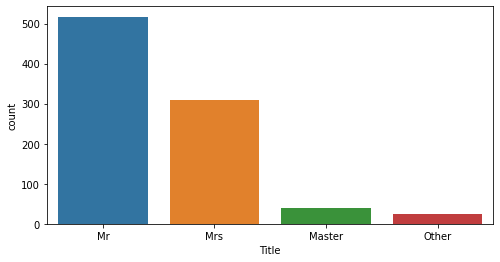

In [357]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_train, x='Title');

In [358]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

Same grouping in test DataFrame

In [359]:
df_test['Title'].replace(['Mr','Miss','Mrs','Master','Col','Rev','Dona','Dr','Ms'],
                        ['Mr','Mrs','Mrs','Master','Other','Other','Other','Other','Mrs'],inplace=True)

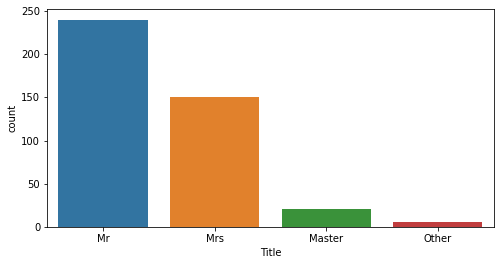

In [360]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_test, x='Title');

In [361]:
df_train = pd.get_dummies(data=df_train, columns=['Title'], drop_first=True)
df_test = pd.get_dummies(data=df_test, columns=['Title'], drop_first=True)

In [362]:
df_train = df_train.drop(columns=['Name'], axis=1)
df_test = df_test.drop(columns=['Name'], axis=1)

Now separate prefix from ticket number

In [363]:
# 'Ticket'
ticket_train = []
for i in list(df_train.Ticket):
    if not i.isdigit() :
        ticket_train.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        ticket_train.append("X")
        
ticket_test = []
for i in list(df_test.Ticket):
    if not i.isdigit() :
        ticket_test.append(i.replace(".","").replace("/","").strip().split(' ')[0])
    else:
        ticket_test.append("X")

In [364]:
ticket_type_train = []
for i in ticket_train:
    ticket_type_train.append(i[0])

df_train['Ticket_type'] = ticket_type_train

ticket_type_test = []
for i in ticket_test:
    ticket_type_test.append(i[0])

df_test['Ticket_type'] = ticket_type_test

In [365]:
df_train['Ticket_type'].unique()

array(['A', 'P', 'S', 'X', 'C', 'W', 'F', 'L'], dtype=object)

In [366]:
df_test['Ticket_type'].unique()

array(['X', 'A', 'W', 'S', 'P', 'C', 'F', 'L'], dtype=object)

Luckily 'Ticket_type' values are the same in both DataFrames

In [367]:
df_train = pd.get_dummies(data=df_train, columns=['Ticket_type'], drop_first=True)
df_test = pd.get_dummies(data=df_test, columns=['Ticket_type'], drop_first=True)

In [368]:
df_train = df_train.drop(columns=['Ticket'],axis=1)
df_test = df_test.drop(columns=['Ticket'],axis=1)

### It looks like we have succesfully, got rid of all missing data and transformed non-numeric data into numeric data. Let's make sure we did that correctly before moving to creating ML model

In [369]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin_type_A     0
Cabin_type_B     0
Cabin_type_C     0
Cabin_type_D     0
Cabin_type_E     0
Cabin_type_F     0
Cabin_type_G     0
Cabin_type_T     0
Cabin_type_X     0
Sex_male         0
Embarked_Q       0
Embarked_S       0
Title_Mr         0
Title_Mrs        0
Title_Other      0
Ticket_type_C    0
Ticket_type_F    0
Ticket_type_L    0
Ticket_type_P    0
Ticket_type_S    0
Ticket_type_W    0
Ticket_type_X    0
dtype: int64

In [370]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Cabin_type_A   891 non-null    uint8  
 8   Cabin_type_B   891 non-null    uint8  
 9   Cabin_type_C   891 non-null    uint8  
 10  Cabin_type_D   891 non-null    uint8  
 11  Cabin_type_E   891 non-null    uint8  
 12  Cabin_type_F   891 non-null    uint8  
 13  Cabin_type_G   891 non-null    uint8  
 14  Cabin_type_T   891 non-null    uint8  
 15  Cabin_type_X   891 non-null    uint8  
 16  Sex_male       891 non-null    uint8  
 17  Embarked_Q     891 non-null    uint8  
 18  Embarked_S

In [371]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin_type_A     0
Cabin_type_B     0
Cabin_type_C     0
Cabin_type_D     0
Cabin_type_E     0
Cabin_type_F     0
Cabin_type_G     0
Cabin_type_X     0
Cabin_type_T     0
Sex_male         0
Embarked_Q       0
Embarked_S       0
Title_Mr         0
Title_Mrs        0
Title_Other      0
Ticket_type_C    0
Ticket_type_F    0
Ticket_type_L    0
Ticket_type_P    0
Ticket_type_S    0
Ticket_type_W    0
Ticket_type_X    0
dtype: int64

In [372]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Fare           418 non-null    float64
 6   Cabin_type_A   418 non-null    uint8  
 7   Cabin_type_B   418 non-null    uint8  
 8   Cabin_type_C   418 non-null    uint8  
 9   Cabin_type_D   418 non-null    uint8  
 10  Cabin_type_E   418 non-null    uint8  
 11  Cabin_type_F   418 non-null    uint8  
 12  Cabin_type_G   418 non-null    uint8  
 13  Cabin_type_X   418 non-null    uint8  
 14  Cabin_type_T   418 non-null    int64  
 15  Sex_male       418 non-null    uint8  
 16  Embarked_Q     418 non-null    uint8  
 17  Embarked_S     418 non-null    uint8  
 18  Title_Mr  

-----
# Now we can create our ML model

We will create and evaluate performence of our model on df_train. If we get right accuracy, recall and precision we will performce a prediction on df_test set. We will be using a LogisticRegression in order to create model.

Firstly split our df_train on train and test set

In [373]:
X = df_train.drop('Survived', axis=1)

In [374]:
y = df_train['Survived']

In [375]:
from sklearn.model_selection import train_test_split

We will also scale our date to rise performence

In [376]:
from sklearn.preprocessing import StandardScaler

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [378]:
scaler = StandardScaler()

In [379]:
X_train = scaler.fit_transform(X_train)

In [380]:
X_test = scaler.transform(X_test)

We will use LogisticRegressionCV to find right hyperparameters for our model

In [381]:
from sklearn.linear_model import LogisticRegressionCV

In [382]:
log_model = LogisticRegressionCV()

In [383]:
log_model.fit(X_train, y_train)

LogisticRegressionCV()

Now we will predict values for X_test set

In [384]:
y_pred = log_model.predict(X_test)

We have to evaluate out prediction

In [385]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [386]:
accuracy_score(y_test, y_pred)

0.8156424581005587

In [387]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



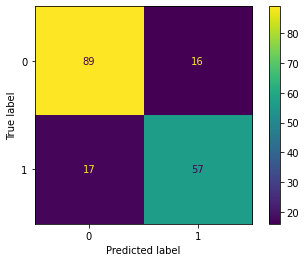

In [388]:
plot_confusion_matrix(log_model, X_test, y_test);

In [389]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

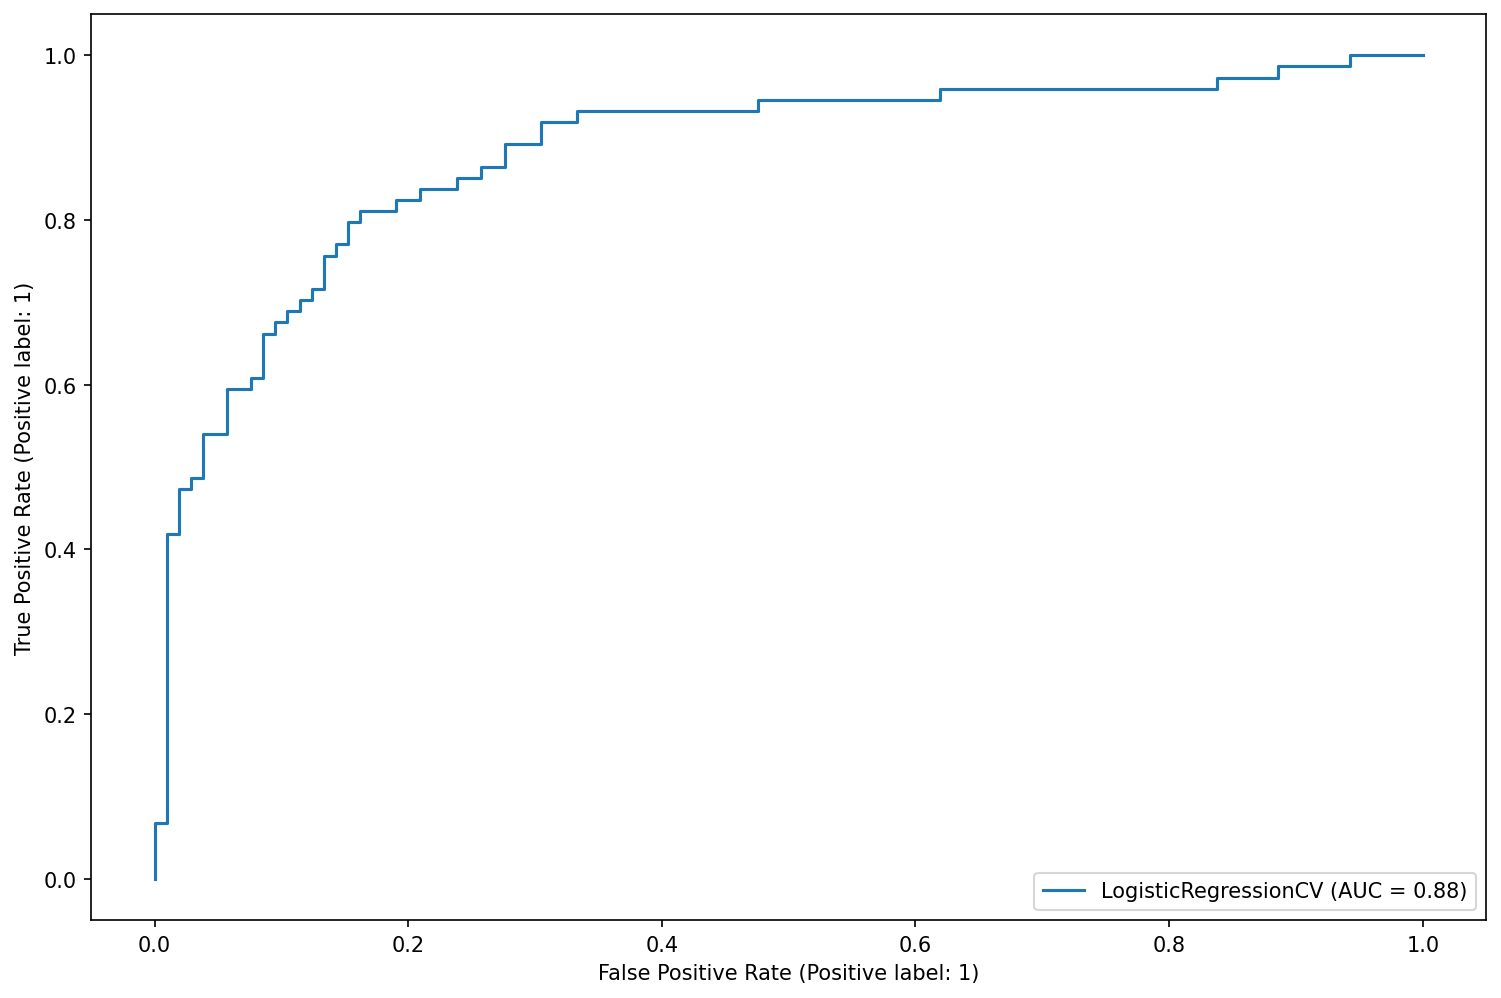

In [390]:
fig, axes = plt.subplots(figsize=(12,8), dpi=150)
plot_roc_curve(log_model, X_test, y_test, ax=axes);

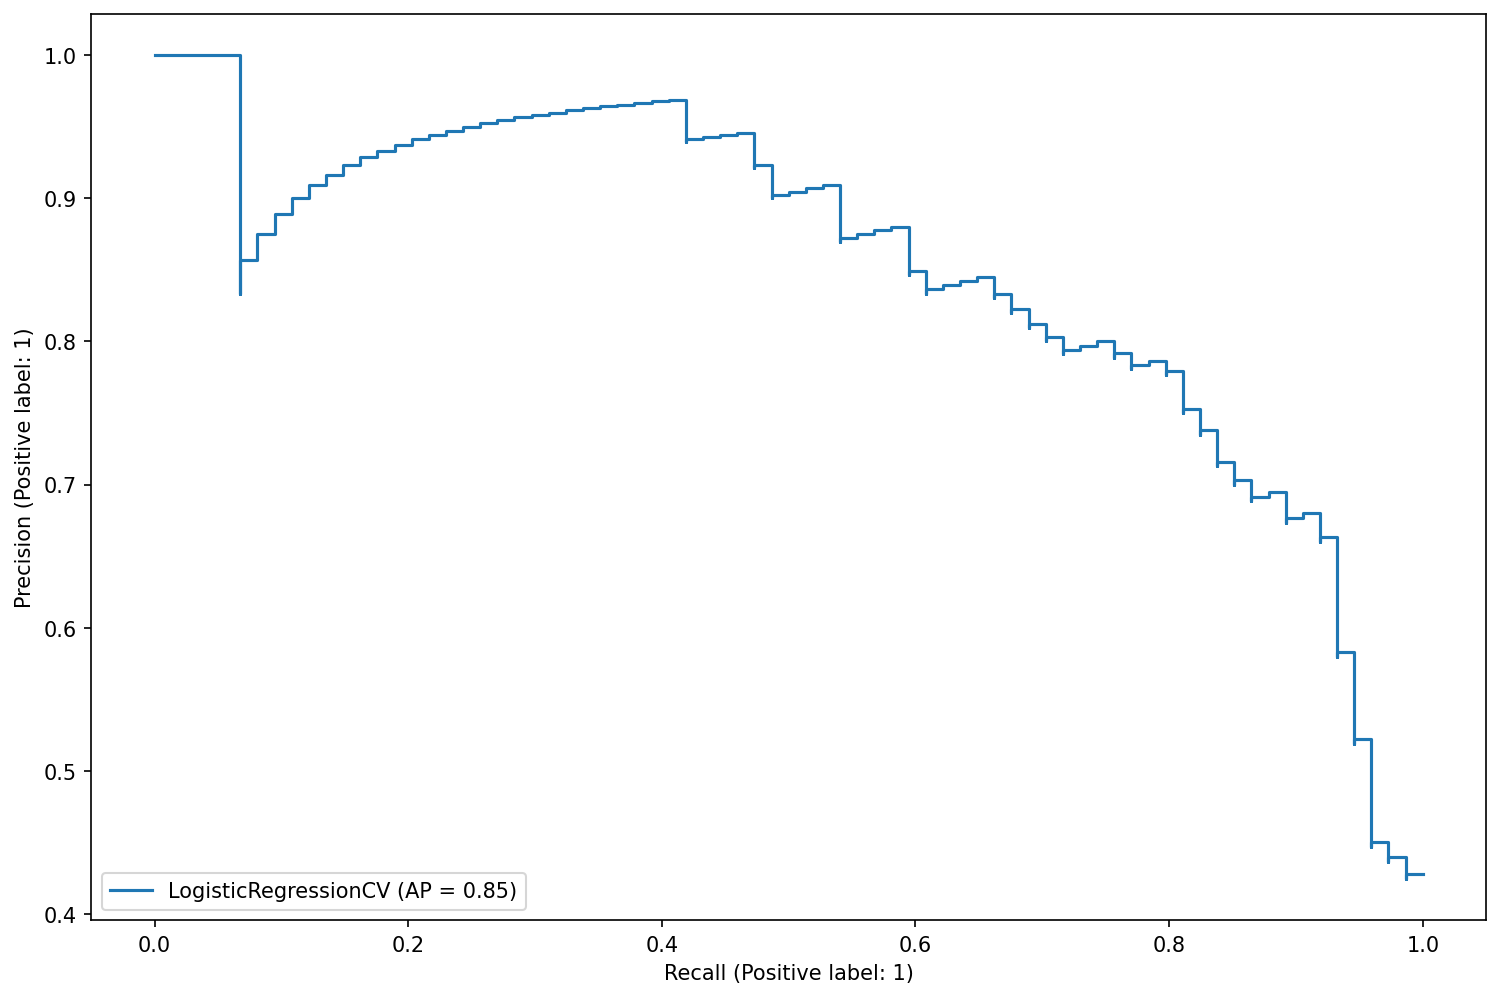

In [391]:
fig, axes = plt.subplots(figsize=(12,8), dpi=150)
plot_precision_recall_curve(log_model, X_test, y_test, ax=axes);

## We can see that our model performed really well. We can fit our model on whole df_test and performe a finall prediction for df_test.

In [392]:
X = df_train.drop('Survived', axis=1)

In [393]:
y = df_train['Survived']

In [394]:
scaler = StandardScaler()

In [395]:
X = scaler.fit_transform(X)

In [396]:
final_model = LogisticRegressionCV()

In [397]:
final_model.fit(X, y)

LogisticRegressionCV()

#### We created final model, it's time to use it on our unseen data - df_test

In [398]:
X_to_pred = df_test

In [399]:
X_to_pred = scaler.transform(X_to_pred)

In [400]:
y_to_pred = final_model.predict(X_to_pred)

We will create a Series containing our prediction and join that with df_test to have one large, nice DataFrama with labeled column.

In [401]:
sur = pd.Series(data=y_to_pred, name='Survived')

In [402]:
df= pd.concat([df_test, sur], axis=1)

In [403]:
df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,...,Title_Mrs,Title_Other,Ticket_type_C,Ticket_type_F,Ticket_type_L,Ticket_type_P,Ticket_type_S,Ticket_type_W,Ticket_type_X,Survived
0,892,3,34.50000,0,0,7.8292,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893,3,47.00000,1,0,7.0000,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,894,2,62.00000,0,0,9.6875,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895,3,27.00000,0,0,8.6625,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,896,3,22.00000,1,1,12.2875,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,1306,1,39.00000,0,0,108.9000,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
415,1307,3,38.50000,0,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
416,1308,3,30.27259,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
